In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/mama.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Limpeza de dados

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

print("Colunas restantes:", X.columns)
print("\nExemplo das respostas (y):")
print(y.head())

Colunas restantes: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Exemplo das respostas (y):
0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


Gráfico de análise gerado: grafico_correlacao.png


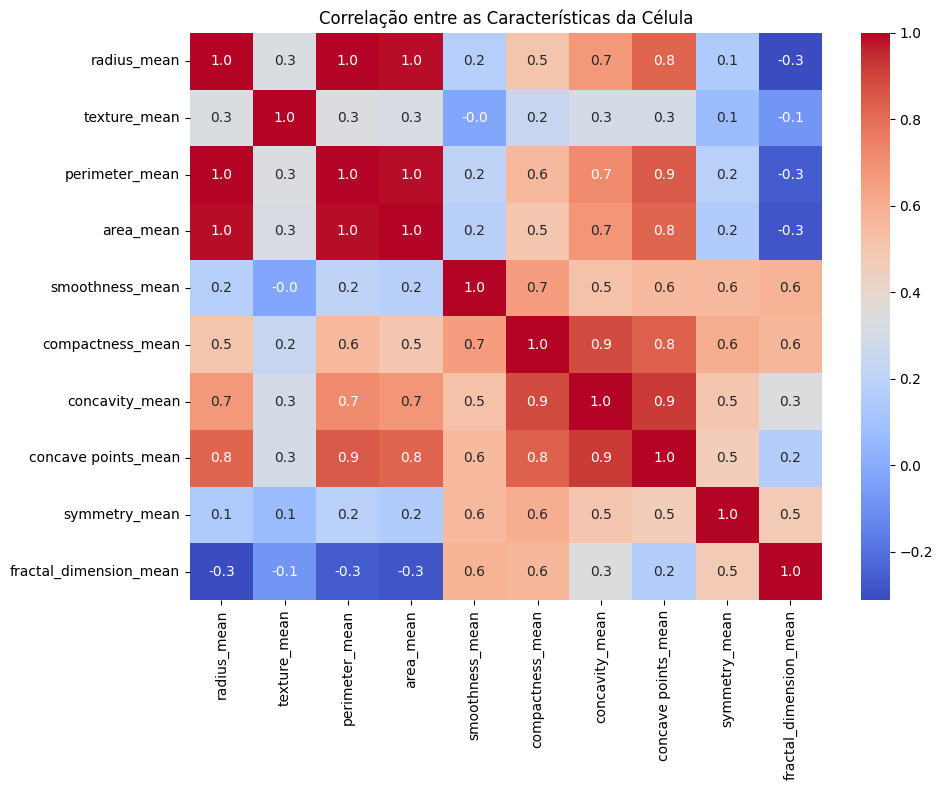

In [ ]:
colunas_principais = df.columns[1:11] 
dados_analise = df[colunas_principais]

plt.figure(figsize=(10, 8))
plt.title("Correlação entre as Características da Célula")

sns.heatmap(dados_analise.corr(), annot=True, fmt=".1f", cmap="coolwarm")

plt.tight_layout()
plt.savefig('grafico_correlacao.png')
print("Gráfico de análise gerado: grafico_correlacao.png")

# Treinamento

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = LogisticRegression(
    max_iter=5000,           
    C=0.8,                   
    solver='liblinear',      
    class_weight='balanced', 
    random_state=42          
)
modelo.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.8
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,5000
,multi_class,'deprecated'


# Avaliação

In [25]:
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)

print("-" * 30)
print(f"ACURÁCIA FINAL: {acuracia * 100:.2f}%")
print("-" * 30)

------------------------------
ACURÁCIA FINAL: 97.37%
------------------------------


-> Imagem salva: slide_matriz_confusao.png


C:\Users\show\AppData\Local\Temp\ipykernel_26252\846994871.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Peso', y='Exame', data=df_imp, palette='viridis')


-> Imagem salva: slide_importancia.png


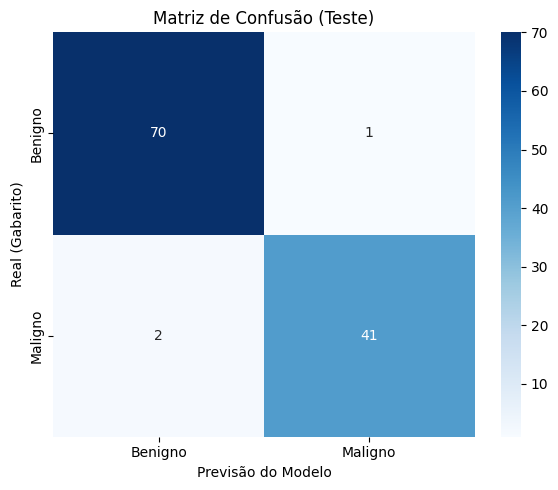

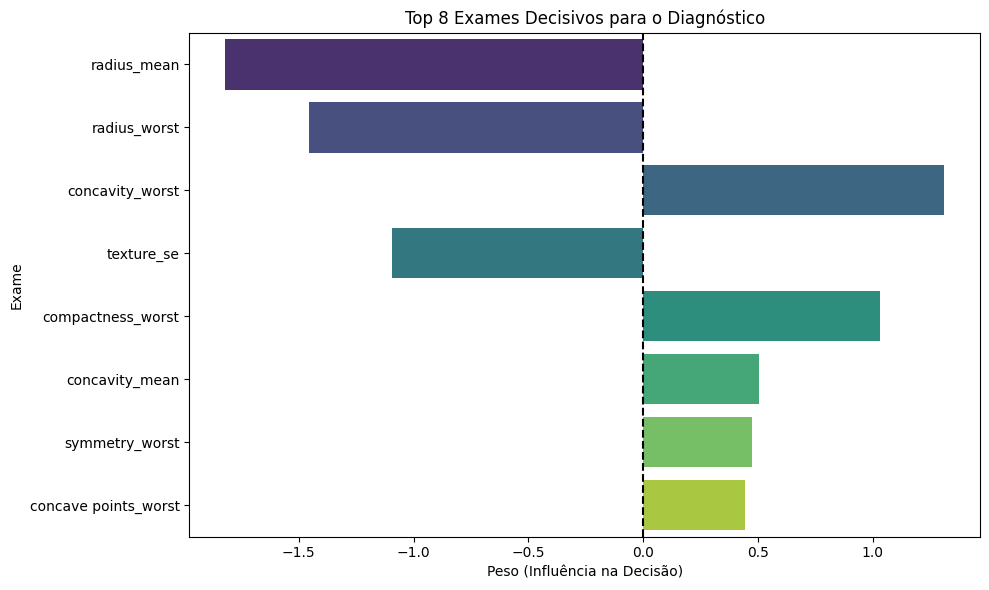

In [ ]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benigno', 'Maligno'],
            yticklabels=['Benigno', 'Maligno'])
plt.title('Matriz de Confusão (Teste)')
plt.ylabel('Real (Gabarito)')
plt.xlabel('Previsão do Modelo')
plt.tight_layout()
plt.savefig('slide_matriz_confusao.png')
print("-> Imagem salva: slide_matriz_confusao.png")

pesos = modelo.coef_[0]
features = X.columns
df_imp = pd.DataFrame({'Exame': features, 'Peso': pesos})
df_imp['Absoluto'] = df_imp['Peso'].abs()
df_imp = df_imp.sort_values(by='Absoluto', ascending=False).head(8)

plt.figure(figsize=(10, 6))
sns.barplot(x='Peso', y='Exame', data=df_imp, palette='viridis')
plt.title('Top 8 Exames Decisivos para o Diagnóstico')
plt.xlabel('Peso (Influência na Decisão)')
plt.axvline(x=0, color='black', linestyle='--') 
plt.tight_layout()
plt.savefig('slide_importancia.png')
print("-> Imagem salva: slide_importancia.png")

In [ ]:
modelo_turbinado = make_pipeline(
    StandardScaler(), 
    LogisticRegression(
        max_iter=5000, 
        C=8.0,              
        solver='liblinear',  
        random_state=42
    )
)

modelo_turbinado.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,8.0


In [38]:
acuracia = modelo_turbinado.score(X_test, y_test)
print(f"Acurácia Turbinada: {acuracia * 100:.2f}%")

Acurácia Turbinada: 97.37%
